In [ ]:
import networkx as nx
import numpy as np
import random
import matplotlib.pyplot as plt
# from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation
import pandas as pd
import requests
from bs4 import BeautifulSoup
from numpy import floor
import statistics
import warnings


format = 2

format_name = ""
if format == 1:
    format_name = "Tests"
elif format == 2:
    format_name = "ODIs"
else:
    format_name = "T20s"

batsmen = []
bowlers=[]

player_names1 = ['Suryakumar Yadav', 'Jaydev Unadkat', 'Umran Malik', 'Shardul Thakur', 'Shubman Gill', 'Sanju Samson', 'Axar Patel', 'Mohammed Siraj', 'Kuldeep Yadav', 'Virat Kohli', 'Ravindra Jadeja', 'Ishan Kishan', 'Ruturaj Gaikwad', 'Yuzvendra Chahal', 'Hardik Pandya', 'Rohit Sharma', 'Mohammed Shami', 'Ravichandran Ashwin', 'Jasprit Bumrah', 'Deepak Chahar', 'Navdeep Saini', 'Washington Sundar']
player_names2 = ['Jhye Richardson', 'Pat Cummins', 'Adam Zampa', 'David Warner', 'Marcus Stoinis', 'Mitchell Starc', 'Glenn Maxwell', 'Mitchell Marsh', 'Marnus Labuschagne', 'Josh Inglis', 'Travis Head', 'Cameron Green', 'Nathan Ellis', 'Alex Carey', 'Ashton Agar', 'Sean Abbott', 'Steven Smith']
ground='Wankhede'


In [ ]:
t=pd.DataFrame()
warnings.filterwarnings("ignore")

for player in player_names1:
    print(player)
    if player=='Rohit Sharma':
        player = 'RG Sharma'

    url = "http://search.espncricinfo.com/ci/content/player/search.html?search=" + player.lower().replace(" ","+") + "&x=0&y=0"
    page = requests.get(url)
    soup = BeautifulSoup(page.content, "html.parser")
    player_id = str(soup.find_all(class_='ColumnistSmry')[0]).split('.html')[0].split('/')[-1]
    tr = pd.read_html(f'https://stats.espncricinfo.com/ci/engine/player/{player_id}.html?class={format};template=results;type=batting;view=innings')[3]
    tr['Runs'] = tr['Runs'].astype(str)
    tr['Runs'] = tr['Runs'].str.replace(r'\*$', '', regex=True) # Remove asterisk at the end of values
    tr = tr[tr['Runs'] != 'DNB']

    tr['Runs'] = pd.to_numeric(tr['Runs'], errors='coerce')
    tr['BF'] = pd.to_numeric(tr['BF'], errors='coerce')  # Convert values to numeric, replacing non-numeric with NaN
    # Remove rows with empty or non-numeric values in the "Runs" column

    tr = tr.dropna(subset=['Runs'])
    tr = tr.dropna(subset=['BF'])
    tr = tr.drop(columns=['Unnamed: 9'])
    # lr = lr.drop(columns=['Unnamed: 0'])
    tr = tr.rename(columns={'Unnamed: 13': 'MatchNo'})
    tr['Dismissal'] = tr['Dismissal'].apply(lambda x: 0 if x == 'not out' else 1)
    tr = tr.rename(columns={'Dismissal': 'Dismissed'})
    tr = tr[tr['Opposition'].str.contains('v Australia', na=False)]
    tr = tr[tr['Ground'].str.contains(ground, na=False)]
    tr = tr.dropna()
    # lr = lr[lr['Opposition'].str.contains('v Australia', na=False)]
    tr['Batter'] = player
    t=pd.concat([t, tr])
    t = t.reset_index()
    t = t.drop(columns=['index'])
t

Suryakumar Yadav
Jaydev Unadkat
Umran Malik
Shardul Thakur
Shubman Gill
Sanju Samson
Axar Patel
Mohammed Siraj
Kuldeep Yadav
Virat Kohli
Ravindra Jadeja
Ishan Kishan
Ruturaj Gaikwad
Yuzvendra Chahal
Hardik Pandya
Rohit Sharma
Mohammed Shami
Ravichandran Ashwin
Jasprit Bumrah
Deepak Chahar
Navdeep Saini
Washington Sundar


,Runs,Mins,BF,4s,6s,SR,Pos,Dismissed,Inns,Opposition,Ground,Start Date,MatchNo,Batter
0,0.0,3,1.0,0,0,0.00,4,1,2,v Australia,Wankhede,17 Mar 2023,ODI # 4538,Suryakumar Yadav
1,13.0,-,10.0,2,0,130.00,8,1,1,v Australia,Wankhede,14 Jan 2020,ODI # 4231,Shardul Thakur
2,20.0,57,31.0,3,0,64.51,2,1,2,v Australia,Wankhede,17 Mar 2023,ODI # 4538,Shubman Gill
3,17.0,-,15.0,2,0,113.33,10,1,1,v Australia,Wankhede,14 Jan 2020,ODI # 4231,Kuldeep Yadav
4,16.0,-,14.0,0,1,114.28,4,1,1,v Australia,Wankhede,14 Jan 2020,ODI # 4231,Virat Kohli
5,4.0,15,9.0,1,0,44.44,3,1,2,v Australia,Wankhede,17 Mar 2023,ODI # 4538,Virat Kohli
6,25.0,-,32.0,2,1,78.12,7,1,1,v Australia,Wankhede,14 Jan 2020,ODI # 4231,Ravindra Jadeja
7,45.0,101,69.0,5,0,65.21,7,0,2,v Australia,Wankhede,17 Mar 2023,ODI # 4538,Ravindra Jadeja
8,3.0,11,8.0,0,0,37.50,1,1,2,v Australia,Wankhede,17 Mar 2023,ODI # 4538,Ishan Kishan
9,25.0,48,31.0,3,1,80.64,6,1,2,v Australia,Wankhede,17 Mar 2023,ODI # 4538,Hardik Pandya


In [ ]:
for player in player_names1:
    if player=='Rohit Sharma':
        player = 'RG Sharma'
    player_data = t[t['Batter'] == player]
    run = player_data['Runs'].sum()
    balls = player_data['BF'].sum()
    diss = player_data[player_data['Dismissed'] != 0].shape[0]

    # Check for zero values to avoid division by zero errors
    sr = run / balls * 100 if balls != 0 else np.nan
    avg = run / diss if diss != 0 else np.nan

     # Replace NaN values with 0
    sr = 0 if np.isnan(sr) else sr
    avg = 0 if np.isnan(avg) else avg

    batsman = {'name': player, 'stats_avg': avg, 'sr': sr}
    batsmen.append(batsman)
    print(batsman)

print(batsmen)


{'name': 'Suryakumar Yadav', 'stats_avg': 0.0, 'sr': 0.0}
{'name': 'Jaydev Unadkat', 'stats_avg': 0, 'sr': 0}
{'name': 'Umran Malik', 'stats_avg': 0, 'sr': 0}
{'name': 'Shardul Thakur', 'stats_avg': 13.0, 'sr': 130.0}
{'name': 'Shubman Gill', 'stats_avg': 20.0, 'sr': 64.51612903225806}
{'name': 'Sanju Samson', 'stats_avg': 0, 'sr': 0}
{'name': 'Axar Patel', 'stats_avg': 0, 'sr': 0}
{'name': 'Mohammed Siraj', 'stats_avg': 0, 'sr': 0}
{'name': 'Kuldeep Yadav', 'stats_avg': 17.0, 'sr': 113.33333333333333}
{'name': 'Virat Kohli', 'stats_avg': 10.0, 'sr': 86.95652173913044}
{'name': 'Ravindra Jadeja', 'stats_avg': 70.0, 'sr': 69.3069306930693}
{'name': 'Ishan Kishan', 'stats_avg': 3.0, 'sr': 37.5}
{'name': 'Ruturaj Gaikwad', 'stats_avg': 0, 'sr': 0}
{'name': 'Yuzvendra Chahal', 'stats_avg': 0, 'sr': 0}
{'name': 'Hardik Pandya', 'stats_avg': 25.0, 'sr': 80.64516129032258}
{'name': 'RG Sharma', 'stats_avg': 10.0, 'sr': 66.66666666666666}
{'name': 'Mohammed Shami', 'stats_avg': 10.0, 'sr': 66.

In [ ]:
o=pd.DataFrame()
for player in player_names2:
  print(player)
  bowle = player
  if player=='Rashid Khan':
    player_id = 'rashid-khan-793463'
  elif player=='Rohit Sharma':
    player = 'rg sharma'
  # else:
  url = "http://search.espncricinfo.com/ci/content/player/search.html?search=" + player.lower().replace(" ","+") + "&x=0&y=0"
  page = requests.get(url)
  soup = BeautifulSoup(page.content, "html.parser")
  player_id = str(soup.find_all(class_='ColumnistSmry')[0]).split('.html')[0].split('/')[-1]
  lr = pd.read_html(f'https://stats.espncricinfo.com/ci/engine/player/{player_id}.html?class={format};template=results;type=bowling;view=innings')[3]
  lr = lr.drop(columns=['Unnamed: 7'])
  lr = lr.rename(columns={'Unnamed: 11': 'MatchNo'})
  lr['Runs'] = pd.to_numeric(lr['Runs'], errors='coerce')
  lr['Wkts'] = pd.to_numeric(lr['Wkts'], errors='coerce')
  lr['Econ'] = pd.to_numeric(lr['Econ'], errors='coerce')  # Convert values to numeric, replacing non-numeric with NaN
  lr['Overs'] = pd.to_numeric(lr['Overs'], errors='coerce')
  lr = lr[lr['Opposition'].str.contains('v India', na=False)]
  lr = lr[lr['Ground'].str.contains(ground, na=False)]
  lr = lr.dropna()
  # mp = mp[mp['Opposition'].str.contains('v Australia', na=False)]
  lr['Balls'] = floor(lr['Overs']) * 6 + floor((lr['Overs']%1 ) * 10)
  lr['player'] = bowle
  # print(lr)
  o=pd.concat([o, lr])
o = o.reset_index()
o

Jhye Richardson
Pat Cummins
Adam Zampa
David Warner
Marcus Stoinis
Mitchell Starc
Glenn Maxwell
Mitchell Marsh
Marnus Labuschagne
Josh Inglis
Travis Head
Cameron Green
Nathan Ellis
Alex Carey
Ashton Agar
Sean Abbott
Steven Smith


,index,Overs,Mdns,Runs,Wkts,Econ,Pos,Inns,Opposition,Ground,Start Date,MatchNo,Balls,player
0,58,10.0,1,44.0,2.0,4.40,2,1,v India,Wankhede,14 Jan 2020,ODI # 4231,60.0,Pat Cummins
1,48,10.0,0,53.0,1.0,5.30,4,1,v India,Wankhede,14 Jan 2020,ODI # 4231,60.0,Adam Zampa
2,76,6.0,0,37.0,0.0,6.16,5,2,v India,Wankhede,17 Mar 2023,ODI # 4538,36.0,Adam Zampa
3,57,7.0,1,27.0,2.0,3.85,2,2,v India,Wankhede,17 Mar 2023,ODI # 4538,42.0,Marcus Stoinis
4,85,10.0,0,56.0,3.0,5.60,1,1,v India,Wankhede,14 Jan 2020,ODI # 4231,60.0,Mitchell Starc
5,107,9.5,0,49.0,3.0,4.98,1,2,v India,Wankhede,17 Mar 2023,ODI # 4538,59.0,Mitchell Starc
6,127,2.0,0,7.0,0.0,3.50,6,2,v India,Wankhede,17 Mar 2023,ODI # 4538,12.0,Glenn Maxwell
7,13,6.0,0,35.0,0.0,5.83,4,2,v India,Wankhede,17 Mar 2023,ODI # 4538,36.0,Cameron Green
8,9,10.0,1,56.0,1.0,5.60,5,1,v India,Wankhede,14 Jan 2020,ODI # 4231,60.0,Ashton Agar
9,8,9.0,0,31.0,0.0,3.44,3,2,v India,Wankhede,17 Mar 2023,ODI # 4538,54.0,Sean Abbott


In [ ]:
for player in player_names2:
    if player=='Rohit Sharma':
        player = 'RG sharma'
    player_data = o[o['player'] == player]
    run = player_data['Runs'].sum()
    balls = player_data['Balls'].sum()
    diss = player_data['Wkts'].sum()
    econ=player_data['Econ'].mean()

    # Check for zero values to avoid division by zero errors
    sr = econ*100/6
    avg = run / diss if diss != 0 else np.nan

     # Replace NaN values with 0
    sr = 0 if np.isnan(sr) else sr
    avg = 0 if np.isnan(avg) else avg

    bowler = {'name': player, 'stats_avg': avg, 'sr': sr}
    bowlers.append(bowler)
    print(bowler)

print(bowlers)


{'name': 'Jhye Richardson', 'stats_avg': 0, 'sr': 0}
{'name': 'Pat Cummins', 'stats_avg': 22.0, 'sr': 73.33333333333334}
{'name': 'Adam Zampa', 'stats_avg': 90.0, 'sr': 95.5}
{'name': 'David Warner', 'stats_avg': 0, 'sr': 0}
{'name': 'Marcus Stoinis', 'stats_avg': 13.5, 'sr': 64.16666666666667}
{'name': 'Mitchell Starc', 'stats_avg': 17.5, 'sr': 88.16666666666667}
{'name': 'Glenn Maxwell', 'stats_avg': 0, 'sr': 58.333333333333336}
{'name': 'Mitchell Marsh', 'stats_avg': 0, 'sr': 0}
{'name': 'Marnus Labuschagne', 'stats_avg': 0, 'sr': 0}
{'name': 'Josh Inglis', 'stats_avg': 0, 'sr': 0}
{'name': 'Travis Head', 'stats_avg': 0, 'sr': 0}
{'name': 'Cameron Green', 'stats_avg': 0, 'sr': 97.16666666666667}
{'name': 'Nathan Ellis', 'stats_avg': 0, 'sr': 0}
{'name': 'Alex Carey', 'stats_avg': 0, 'sr': 0}
{'name': 'Ashton Agar', 'stats_avg': 56.0, 'sr': 93.33333333333333}
{'name': 'Sean Abbott', 'stats_avg': 0, 'sr': 57.333333333333336}
{'name': 'Steven Smith', 'stats_avg': 0, 'sr': 0}
[{'name': 

In [ ]:
def bernoulli_monte_carlo(avg, sr, simulations=1000):
    r = sr/100
    q = r/avg
    p = 1-q
    runs = r*np.array([simulate_inning(p) for i in range(simulations)])
    result = {'mean': np.mean(runs), 'sd': np.std(runs)}
    return result

def simulate_inning(p, balls=300, wickets=10):
    result = np.random.binomial(1, p, balls)
    fall_of_wicket = np.where(result == 0)[0]
    nheads = 0
    if len(fall_of_wicket) < wickets:
        nheads = np.sum(result)
    else:
        last_wicket_index = fall_of_wicket[wickets-1]
        nheads = np.sum(result[:last_wicket_index])
    return nheads

def matchup(avg, sr, simulations=1000):
    r = sr/100
    q = r/avg
    p = 1-q
    runs = r*np.array([simulate_matchup(p) for i in range(simulations)])
    result = {'mean': np.mean(runs), 'sd': np.std(runs)}
    return result

def simulate_matchup(p, balls=60, wickets=1):
    result = np.random.binomial(1, p, balls)
    fall_of_wicket = np.where(result == 0)[0]
    nheads = 0
    if len(fall_of_wicket) < wickets:
        nheads = np.sum(result)
    else:
        last_wicket_index = fall_of_wicket[wickets-1]
        nheads = np.sum(result[:last_wicket_index])
    return nheads

def analyse(avg, sr, simulations=1000):
    r = sr/100
    q = r/avg
    p = 1-q
    runs = r*np.array([simulate_analyse(p) for i in range(simulations)])
    result = {'mean': np.mean(runs), 'sd': np.std(runs)}
    return result

def simulate_analyse(p, balls=300, wickets=1):
    result = np.random.binomial(1, p, balls)
    fall_of_wicket = np.where(result == 0)[0]
    nheads = 0
    if len(fall_of_wicket) < wickets:
        nheads = np.sum(result)
    else:
        last_wicket_index = fall_of_wicket[wickets-1]
        nheads = np.sum(result[:last_wicket_index])
    return nheads

In [ ]:

# # Create a new bipartite graph
# graph = nx.Graph()

# for i, bowler in enumerate(bowlers):
#         bowler['index'] = i

# for i, batsman in enumerate(batsmen):
#         batsman['index'] = i


# # Add batsmen nodes to Set 1
# for batsman in batsmen:
#     graph.add_node(batsman['name'], bipartite=0)

# # Add bowler nodes to Set 2
# for bowler in bowlers:
#     if bowler['stats_avg'] != 0 or bowler['sr'] != 0:
#         graph.add_node(bowler['name'], bipartite=1)

# # # Connect edges between batsmen and bowlers
# matchup_analysis = {}
# for batsman in batsmen:
#     for bowler in bowlers:
#         if batsman['stats_avg'] != 0 and (bowler['stats_avg'] != 0 and bowler['sr'] != 0):
#             graph.add_edge(bowler['name'], batsman['name'])
#             avg = (batsman['stats_avg'] + bowler['stats_avg']) / 2
#             sr = (batsman['sr'] + bowler['sr']) / 2
#             analysis = matchup(avg, sr)
#             matchup_analysis[(bowler['name'], batsman['name'])] = analysis

# Create a new bipartite graph
import networkx as nx
import statistics

# Assuming you have the 'bowlers' and 'batsmen' lists available

# Create a new bipartite graph
graph = nx.Graph()

# # Add batsmen nodes to Set 1
# for batsman in batsmen:
#     graph.add_node(batsman['name'], bipartite=0)

# # Add bowler nodes to Set 2
# for bowler in bowlers:
#     if bowler['stats_avg'] != 0 or bowler['sr'] != 0:
#         graph.add_node(bowler['name'], bipartite=1)

# Add batsmen nodes to Set 1
for batsman in batsmen:
    batsman_name = batsman['name']
    batsman_stats_avg = batsman['stats_avg']
    batsman_sr = batsman['sr']
    graph.add_node(batsman_name, bipartite=0, avg=batsman_stats_avg, sr=batsman_sr)

# Add bowler nodes to Set 2
for bowler in bowlers:
    if bowler['stats_avg'] != 0 or bowler['sr'] != 0:
        bowler_name = bowler['name']
        bowler_stats_avg = bowler['stats_avg']
        bowler_sr = bowler['sr']
        graph.add_node(bowler_name, bipartite=1, avg=bowler_stats_avg, sr=bowler_sr)

# Connect edges between batsmen and bowlers
matchup_analysis = {}
for batsman in batsmen:
    batsman_name = batsman['name']
    batsman_stats_avg = batsman['stats_avg']
    batsman_sr = batsman['sr']
    batsman_net_mean_list = []
    batsman_net_sd_list = []
    for bowler in bowlers:
        bowler_name = bowler['name']
        bowler_stats_avg = bowler['stats_avg']
        bowler_sr = bowler['sr']

        if batsman_stats_avg != 0 and (bowler_stats_avg != 0 or bowler_sr != 0):
            graph.add_edge(bowler_name, batsman_name)
            avg = (batsman_stats_avg + bowler_stats_avg) / 2
            sr = (batsman_sr + bowler_sr) / 2
            analysis = matchup(avg, sr)
            matchup_analysis[(bowler_name, batsman_name)] = analysis
            batsman_net_mean_list.append(analysis['mean'])
            batsman_net_sd_list.append(analysis['sd'])
    if batsman_net_mean_list:
        batsman_net_mean = statistics.mean(batsman_net_mean_list)
    else:
        batsman_net_mean = 0
    if len(batsman_net_sd_list) > 1:
        batsman_net_sd = statistics.stdev(batsman_net_sd_list)
    else:
        batsman_net_sd = 0
    batsman['mean'] = batsman_net_mean
    batsman['net_sd'] = batsman_net_sd

# Sort the batsmen by net mean and SD in descending order
sorted_batsmen = sorted(batsmen, key=lambda x: (x['mean'], x['net_sd']), reverse=True)

# Select the top 7 batsmen with the highest net mean and SD for Team1
team1_batsmen = [batsman for batsman in sorted_batsmen if batsman['mean'] != 0 and batsman['net_sd'] != 0][:11]

# Calculate the net mean and SD for each bowler against all batsmen
for bowler in bowlers:
    bowler_name = bowler['name']
    bowler_stats_avg = bowler['stats_avg']
    bowler_sr = bowler['sr']
    bowler_net_mean_list = []
    bowler_net_sd_list = []
    for batsman in batsmen:
        batsman_name = batsman['name']
        batsman_stats_avg = batsman['stats_avg']
        batsman_sr = batsman['sr']
        if bowler_stats_avg != 0 and bowler_sr != 0 and batsman_stats_avg != 0:
            avg = (batsman_stats_avg + bowler_stats_avg) / 2
            sr = (batsman_sr + bowler_sr) / 2
            analysis = matchup(avg, sr)
            bowler_net_mean_list.append(analysis['mean'])
            bowler_net_sd_list.append(analysis['sd'])
    if bowler_net_mean_list:
        bowler_net_mean = statistics.mean(bowler_net_mean_list)
    else:
        bowler_net_mean = 0
    if len(bowler_net_sd_list) > 1:
        bowler_net_sd = statistics.stdev(bowler_net_sd_list)
    else:
        bowler_net_sd = 0
    bowler['mean'] = bowler_net_mean
    bowler['net_sd'] = bowler_net_sd

# Sort the bowlers by net mean and SD in ascending order
sorted_bowlers = sorted(bowlers, key=lambda x: (x['mean'], x['net_sd']))

# Select the top 5 bowlers with the lowest net mean and SD for Team2
team2_bowlers = [bowler for bowler in sorted_bowlers if bowler['mean'] != 0 and bowler['net_sd'] != 0][:5]

In [ ]:
if nx.is_bipartite(graph):
        print("Graph is bipartite.")
else:
        print("Graph is not bipartite.")
print(graph)

Graph is bipartite.
Graph with 30 nodes and 72 edges


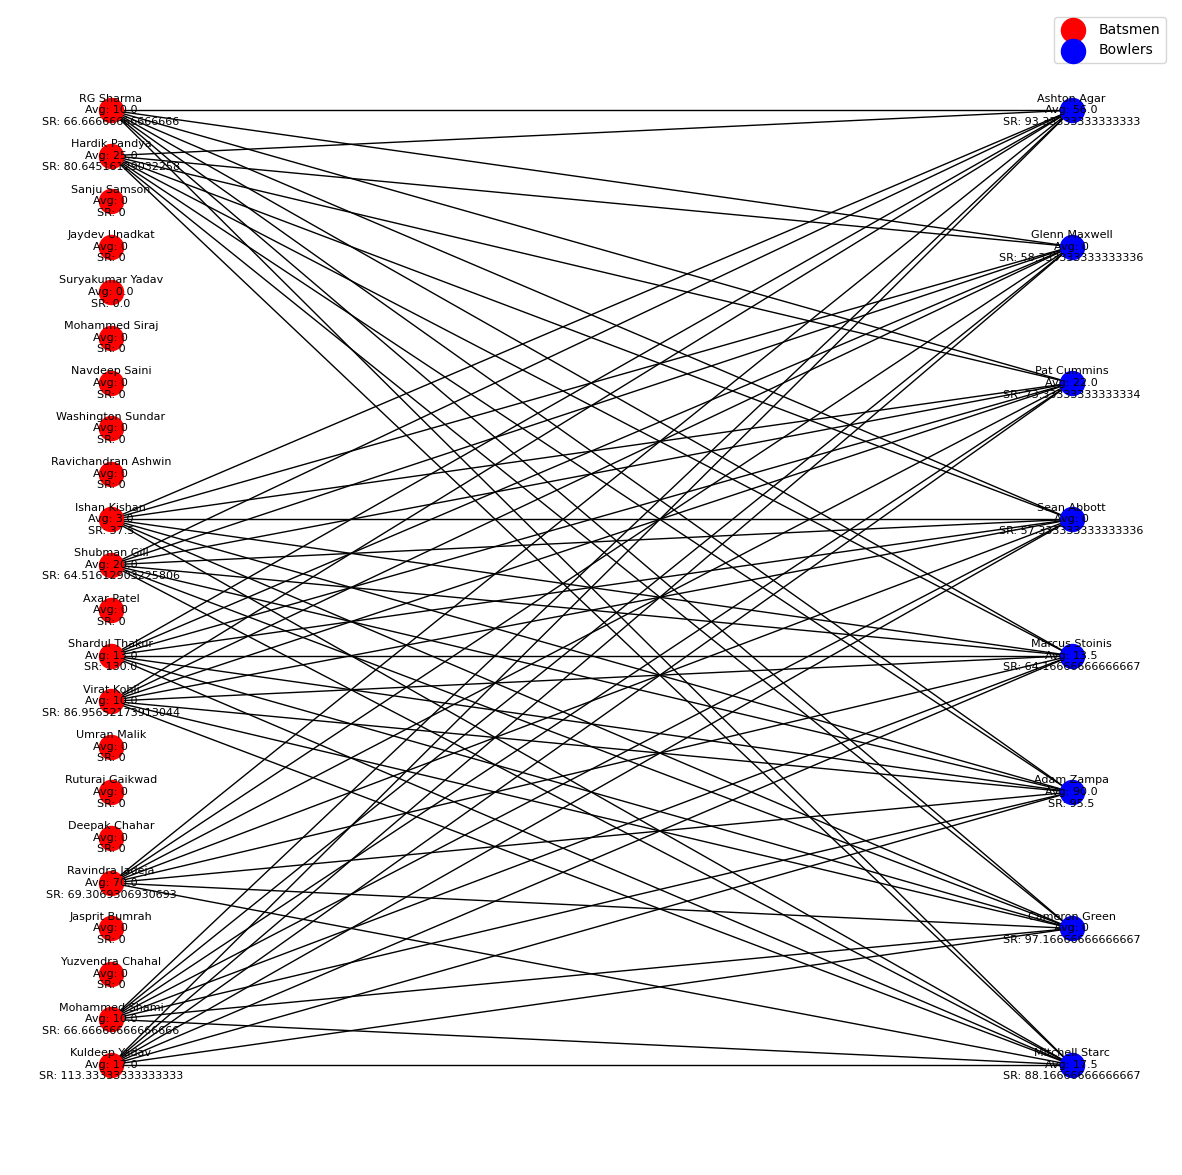

In [ ]:
# # Separate the nodes into two sets
# set1 = {n for n, d in graph.nodes(data=True) if d['bipartite'] == 0}
# set2 = set(graph) - set1

# # Plot the bipartite graph
# pos = nx.bipartite_layout(graph, set1, align='vertical', scale=2.0)  # Adjust the scale parameter for increased spacing
# plt.figure(figsize=(15, 15))
# nx.draw_networkx_nodes(graph, pos, nodelist=set1, node_color='r', label='Batsmen')
# nx.draw_networkx_nodes(graph, pos, nodelist=set2, node_color='b', label='Bowlers')
# nx.draw_networkx_edges(graph, pos)
# nx.draw_networkx_labels(graph, pos)

# plt.axis('off')
# plt.legend()
# plt.show()

set1 = {n for n, d in graph.nodes(data=True) if d['bipartite'] == 0}
set2 = set(graph) - set1

# Plot the bipartite graph
pos = nx.bipartite_layout(graph, set1, align='vertical', scale=2.0)  # Adjust the scale parameter for increased spacing
plt.figure(figsize=(15, 15))

# Draw batsmen nodes with player name, avg, and sr as labels
batsmen_labels = {node: f"{node}\nAvg: {graph.nodes[node]['avg']}\nSR: {graph.nodes[node]['sr']}" for node in set1}
nx.draw_networkx_nodes(graph, pos, nodelist=set1, node_color='r', label='Batsmen')
nx.draw_networkx_labels(graph, pos, labels=batsmen_labels, font_color='k', font_size=8)

# Draw bowler nodes with player name, avg, and sr as labels
bowlers_labels = {node: f"{node}\nAvg: {graph.nodes[node]['avg']}\nSR: {graph.nodes[node]['sr']}" for node in set2}
nx.draw_networkx_nodes(graph, pos, nodelist=set2, node_color='b', label='Bowlers')
nx.draw_networkx_labels(graph, pos, labels=bowlers_labels, font_color='k', font_size=8)

# Draw edges
nx.draw_networkx_edges(graph, pos)

plt.axis('off')
plt.legend()
plt.show()

In [ ]:
# Print the matchup analysis
for edge, analysis in matchup_analysis.items():
    print(f"{edge}: {analysis}")

('Pat Cummins', 'Shardul Thakur'): {'mean': 15.458416666666665, 'sd': 15.043883455993003}
('Adam Zampa', 'Shardul Thakur'): {'mean': 36.7080175, 'sd': 24.235762675505875}
('Marcus Stoinis', 'Shardul Thakur'): {'mean': 12.099495833333334, 'sd': 11.84665838254069}
('Mitchell Starc', 'Shardul Thakur'): {'mean': 13.723774166666667, 'sd': 13.574167960667644}
('Glenn Maxwell', 'Shardul Thakur'): {'mean': 5.398575000000001, 'sd': 5.989304331235205}
('Cameron Green', 'Shardul Thakur'): {'mean': 5.3509108333333355, 'sd': 5.986550604523571}
('Ashton Agar', 'Shardul Thakur'): {'mean': 28.24943333333333, 'sd': 22.5137058431081}
('Sean Abbott', 'Shardul Thakur'): {'mean': 5.356796666666667, 'sd': 5.885222017410313}
('Pat Cummins', 'Shubman Gill'): {'mean': 17.211194623655917, 'sd': 13.494507646850836}
('Adam Zampa', 'Shubman Gill'): {'mean': 30.724696935483866, 'sd': 17.763022764413}
('Marcus Stoinis', 'Shubman Gill'): {'mean': 13.854633198924732, 'sd': 11.604964382367196}
('Mitchell Starc', 'Shubm

In [ ]:
# Print the selected teams with their mean and SD
print("Team 1 (Batsmen):")
for batsman in team1_batsmen:
    batsman_name = batsman['name']
    batsman_net_mean = batsman['mean']
    batsman_net_sd = batsman['net_sd']
    print(f"{batsman_name} (Net Mean: {batsman_net_mean}, Net SD: {batsman_net_sd})")

print("\nTeam 2 (Bowlers):")
for bowler in team2_bowlers:
    bowler_name = bowler['name']
    bowler_net_mean = bowler['mean']
    bowler_net_sd = bowler['net_sd']
    print(f"{bowler_name} (Net Mean: {bowler_net_mean}, Net SD: {bowler_net_sd})")


Team 1 (Batsmen):
Ravindra Jadeja (Net Mean: 27.83174907487624, Net SD: 1.5838740137029819)
Hardik Pandya (Net Mean: 19.167609996639783, Net SD: 3.462174160333712)
Kuldeep Yadav (Net Mean: 17.146345104166667, Net SD: 6.109796374174428)
Shubman Gill (Net Mean: 16.726904133064515, Net SD: 3.562304187458244)
Shardul Thakur (Net Mean: 15.293177499999999, Net SD: 7.284074186411746)
Virat Kohli (Net Mean: 13.720533011775363, Net SD: 6.196867689658941)
Mohammed Shami (Net Mean: 13.478297291666665, Net SD: 5.420203529622429)
RG Sharma (Net Mean: 13.287509895833333, Net SD: 5.4208118154874585)
Ishan Kishan (Net Mean: 9.9095578125, Net SD: 5.584560793720968)

Team 2 (Bowlers):
Marcus Stoinis (Net Mean: 13.666295209018331, Net SD: 2.1620474444444033)
Mitchell Starc (Net Mean: 15.655141659362174, Net SD: 2.4743919122258373)
Pat Cummins (Net Mean: 17.033230668099534, Net SD: 1.9271681079662273)
Ashton Agar (Net Mean: 27.210711766014725, Net SD: 2.4556988685480348)
Adam Zampa (Net Mean: 33.046701610

In [ ]:
# import random

# # Initialize match parameters
# total_overs = 50
# score_team1 = 0
# wickets_team1 = 0
# current_over = 0
# current_ball = 0
# current_batsman_index = 0
# current_bowler_index = 0

# # Set initial runs and balls value for each batsman
# for batsman in team1_batsmen:
#     batsman['runs'] = 0
#     batsman['balls'] = 0

# # Set initial overs, runs_conceded, and wickets value for each bowler
# for bowler in team2_bowlers:
#     bowler['overs'] = 0.0
#     bowler['runs_conceded'] = 0
#     bowler['wickets'] = 0

# # Start the match simulation loop
# while current_over < total_overs:
#     # Increment the ball count
#     current_ball += 1

#     # Simulate the ball delivery
#     outcome = random.random()  # Generate a random outcome between 0 and 1

#     # Update match statistics based on the outcome
#     if outcome < 0.2:  # Dot ball
#         print(f"Over {current_over + 1}.{current_ball}: Dot ball")
#         team1_batsmen[current_batsman_index]['balls'] += 1
#     elif outcome < 0.6:  # Single
#         score_team1 += 1
#         team1_batsmen[current_batsman_index]['runs'] += 1
#         team1_batsmen[current_batsman_index]['balls'] += 1
#         print(f"Over {current_over + 1}.{current_ball}: Single")
#     elif outcome < 0.8:  # Double
#         score_team1 += 2
#         team1_batsmen[current_batsman_index]['runs'] += 2
#         team1_batsmen[current_batsman_index]['balls'] += 1
#         print(f"Over {current_over + 1}.{current_ball}: Double")
#     elif outcome < 0.95:  # Four
#         score_team1 += 4
#         team1_batsmen[current_batsman_index]['runs'] += 4
#         team1_batsmen[current_batsman_index]['balls'] += 1
#         print(f"Over {current_over + 1}.{current_ball}: Four")
#     elif outcome < 0.99:  # Six
#         score_team1 += 6
#         team1_batsmen[current_batsman_index]['runs'] += 6
#         team1_batsmen[current_batsman_index]['balls'] += 1
#         print(f"Over {current_over + 1}.{current_ball}: Six")
#     else:  # Wicket
#         wickets_team1 += 1
#         print(f"Over {current_over + 1}.{current_ball}: Wicket")

#         # Move to the next batsman
#         current_batsman_index += 1
#         if current_batsman_index >= len(team1_batsmen):
#             # All batsmen have been dismissed
#             break

#     # Update bowler's overs, runs_conceded, and wickets
#     if current_ball == 6:
#         team2_bowlers[current_bowler_index]['overs'] += 1
#         team2_bowlers[current_bowler_index]['runs_conceded'] += score_team1
#         team2_bowlers[current_bowler_index]['wickets'] += wickets_team1
#         current_bowler_index += 1
#         if current_bowler_index >= len(team2_bowlers):
#             current_bowler_index = 0

#     # Check if the current over is completed
#     if current_ball == 6:
#         current_over += 1
#         current_ball = 0

# # Print the match summary
# print("\nMatch Summary:")
# print(f"Team 1 Total Score: {score_team1}/{wickets_team1}")
# print("\nBatsman Statistics:")
# for batsman in team1_batsmen:
#     print(f"{batsman['name']}: {batsman['runs']} runs in {batsman['balls']} balls")
# print("\nBowler Statistics:")
# for bowler in team2_bowlers:
#     print(f"{bowler['name']}: {bowler['overs']} overs, {bowler['runs_conceded']} runs, {bowler['wickets']} wickets")
